Employee Retention Analysis

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Data Files
salary_data_path = "Resources/Salary_Data.csv"
employee_data_path = "Resources/WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Reading in data
salary_data = pd.read_csv(salary_data_path)
employee_data = pd.read_csv(employee_data_path)

In [11]:
salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age Range
0,32,Male,Bachelor's,Software Engineer,5,90000,30-39
1,28,Female,Master's,Data Analyst,3,65000,18-29
2,45,Male,PhD,Senior Manager,15,150000,40-49
3,36,Female,Bachelor's,Sales Associate,7,60000,30-39
4,52,Male,Master's,Director,20,200000,50+
...,...,...,...,...,...,...,...
6699,49,Female,PhD,Director of Marketing,20,200000,50+
6700,32,Male,High School,Sales Associate,3,50000,30-39
6701,30,Female,Bachelor's Degree,Financial Manager,4,55000,30-39
6702,46,Male,Master's Degree,Marketing Manager,14,140000,40-49


C:\Users\rbutt8262\AppData\Local\Temp\ipykernel_15500\3493355605.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data['Years of Experience'] = salary_data['Years of Experience'].astype(int)
C:\Users\rbutt8262\AppData\Local\Temp\ipykernel_15500\3493355605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data['Salary'] = salary_data['Salary'].astype(int)
C:\Users\rbutt8262\AppData\Local\Temp\ipykernel_15500\3493355605.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy 

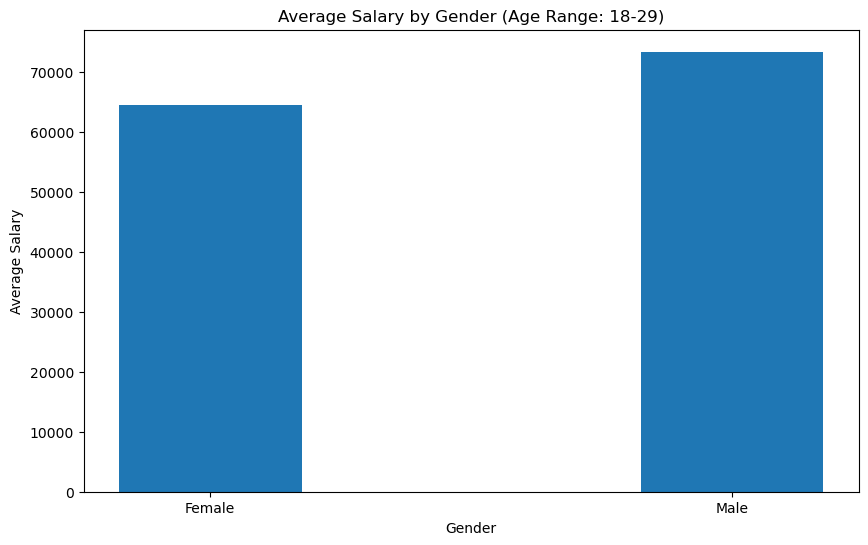

In [7]:
# Handling non-finite values in "Years of Experience" and "Salary" columns
salary_data['Years of Experience'] = salary_data['Years of Experience'].replace([np.inf, -np.inf], np.nan)
salary_data['Salary'] = salary_data['Salary'].replace([np.inf, -np.inf], np.nan)

# Dropping rows with NaN values in "Years of Experience" and "Salary" columns
salary_data = salary_data.dropna(subset=['Years of Experience', 'Salary'])

# Converting "Years of Experience" and "Salary" columns to integers
salary_data['Years of Experience'] = salary_data['Years of Experience'].astype(int)
salary_data['Salary'] = salary_data['Salary'].astype(int)

# Convert the "Age" column to integers
salary_data['Age'] = salary_data['Age'].astype(int)

# Create a new column for age ranges
bins = [18, 29, 39, 49, np.inf]
labels = ['18-29', '30-39', '40-49', '50+']
salary_data['Age Range'] = pd.cut(salary_data['Age'], bins=bins, labels=labels, right=False)

# Filter data for the specified age range (18-29)
filtered_data = salary_data[(salary_data['Age Range'] == '18-29')]

# Group filtered data by gender and calculate average salary
grouped_data = filtered_data.groupby('Gender')['Salary'].mean()

if 'Other' in grouped_data.index:
    grouped_data = grouped_data.drop('Other')


# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Position of bars on x-axis
x_values = np.arange(len(grouped_data))

# Plotting bars for men and women
ax.bar(x_values, grouped_data, width=0.35)

# Adding labels and title to the graph
ax.set_xlabel('Gender')
ax.set_ylabel('Average Salary')
ax.set_title('Average Salary by Gender (Age Range: 18-29)')
ax.set_xticks(x_values)
ax.set_xticklabels(grouped_data.index)

# Display the bar graph
plt.show()


In [12]:
employee_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
